

# Project: Investigating No-Show Appointments Data For Patients in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be analysing data associated with medical appointments. With over 100,000 set of medical appointments data from Brazil. There are series of factors that might influece a patient to show-up or not show up for there medical appointment. 
The no-show information of the data is our focus in particular, we will be interested in finding trends and partterns among patients we has appointments and the variables that may have lead to them not showing up for their medical appointment. 

>Interestingly, some patients benefit from a scholarship program. These ones are enrolled in the Brasillian welfare program known as the <u>Bolsa Familia</u>. We will see how this variable along with other variable, how the influece a patient seriousness about his/her medical appointments. If having a number of medical condition is a factor worth looking into.

>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

> Further information about the scholarship programe, click on <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Familia</a>



In [1]:
# to import all neccessary packages and Load  data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#load data set 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# to displays a coincise summary of datafram
#including the number of non-null value in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

>comparing the  Range index from the info, our data set does not have any null value. we can confirm usind the code below

In [5]:
# to confirm the no null value.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# to check for duplicated data
df.duplicated().sum()

0

In [7]:
# to investigate number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#this return the useful descriptive statistic for each column data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning 

>There are no null values or duplicates value, or need to replace a missing data. With most of the cleaning is done,  some columns name are spelt wrongly which needs to be corrected. Since we will not be working with columns like the appointment Id and other column with unique value more than 2, our focus will be on variables with unique value of 2. The describe also shows that we have ages lesse than 1, it has to be drop as it is not a valid age.


In [9]:
#To rename the column spelt wrongly.
df.rename(columns={'Hipertension':'Hypertension', 'No-show':'No_show'}, inplace=True)

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# To drop some Column we wont be needing for the analysis
df.drop(['AppointmentDay','ScheduledDay','AppointmentID','PatientId'],axis=1, inplace=True)

In [12]:
# To confirm the changes
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# check for the minimum and maximum age
print(df.Age.max())
print(df.Age.min())

115
-1


In [14]:
df.Age.min()

-1

In [15]:
# to check for rows with age lesses than zero
df.query('Age == -1')

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
#remove cell with age of -1

df = df.drop(index=99832)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hypertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   No_show        110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [17]:
# to group/categorise by ages and inserting in a new column Age_
bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120]
labels = ["child","teen","20s","young_adult","older_adult", "50s", "60s", "70s", "80s", "90s", "100s", "110s"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#to confirm
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_Group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60s
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50s
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,60s
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50s
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,50s
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,50s
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,20s
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,young_adult


In [18]:
# to count numbers of patients in each group
df['Age_Group'].value_counts(sort=False)

child          17475
teen           12936
20s            13699
young_adult    15171
older_adult    14209
50s            15863
60s            11876
70s             5934
80s             2946
90s              406
100s               6
110s               5
Name: Age_Group, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

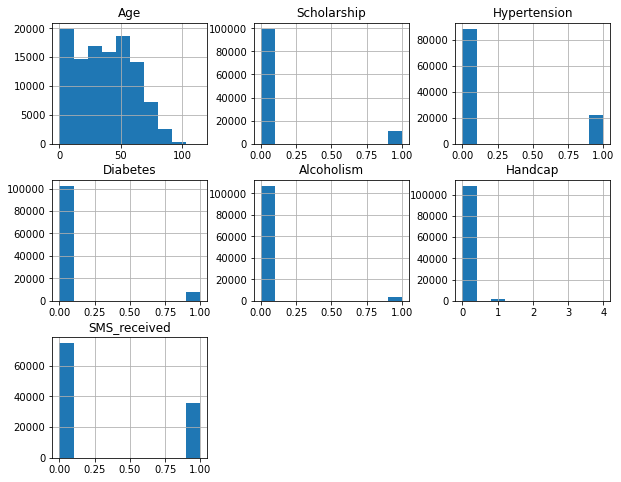

In [19]:
# To have a better view of the data
df.hist(figsize = (10, 8))

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that the data  has been cleaned, we're ready to move on to exploration. we will be performing investigations on the data so as to discover patterns, test hypothesis, check assumptions with the help of Computed statistical summary andalso create visualizations with the goal of addressing the research questions that will be posed.  in other to achieve this, we will be  Looking at one variable at a time, then we will also be considering the No_show variable with other variables and then follow it up by looking at relationships between other variables.

###  Question 1 :  How many patient show up for their appointment and how many did not in each age group?

In [20]:
#Groupby age and no_show
df.groupby(['No_show', 'Age_Group']).size()

No_show  Age_Group  
No       child          13991
         teen            9679
         20s            10319
         young_adult    11871
         older_adult    11329
         50s            13087
         60s            10086
         70s             5032
         80s             2481
         90s              324
         100s               6
         110s               2
Yes      child           3484
         teen            3257
         20s             3380
         young_adult     3300
         older_adult     2880
         50s             2776
         60s             1790
         70s              902
         80s              465
         90s               82
         100s               0
         110s               3
dtype: int64

In [21]:
# write a function that accepts all labels
def label(a, b, c):
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(c), 
    plt.legend(loc='upper right')
    plt.show()

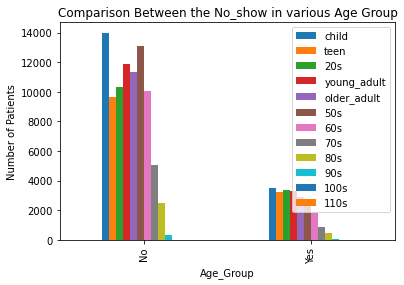

In [22]:
df.groupby(['No_show','Age_Group']).size().unstack(fill_value=1).plot.bar()
label('Age_Group', 'Number of Patients','Comparison Between the No_show in various Age Group')

>At this point, we want to note that the description for the data states: <p style="color:red;"><b><i>No_show column</i>, says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</b></p>.

>FRom our data set above, The Margin between those that showed up for their appointment and those that did not show up for their appointment is high

<p><b>Conclusion</b> Age does not affect if a patient shows up or not. From the chart, various patients at different age group did show up for their appointment.</p>


###  Question 2:  Does Having aScholarship in the Brasillian Programm Influence a Patient To Show Up For TheirScheduled Appointment?

In [23]:
#First we check for the number of thouse who did not show up for appointments
# and that of those what showed up.
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64


From the value count we pulled above, we see that of all the  110526 patients with a scheduled appointment, 88207 did show up for their appointments which is about 79.8% of the total number of appointments. On the other hand, 22319 patient did not show up for there appointments. That is about 20.2% of the total number of appointment.  
we could conclude that for every 11 appointments (9/11), an approximate of 9persons shows up while 2 did not show up (2/11).


In [24]:
# to find out the number of those with scholaship
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

> From the apointment data, we see that of the entire number of appointments, about 90.2% do not have a scholarship while the remaining 9.8% do have.

In [25]:
# USing the group by function
# To find number of those that did not show up in relation to if they hava a scholarship or not.
df.groupby(['No_show', 'Scholarship']).size()

No_show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
dtype: int64

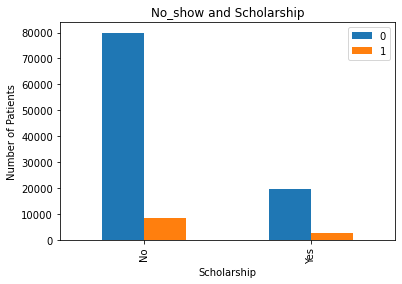

In [26]:
df.groupby(['No_show','Scholarship']).size().unstack(fill_value=1).plot.bar()
label('Scholarship', 'Number of Patients', 'No_show and Scholarship')

>From the series of outputs to the functions, it is noted that 22319 patient (20%) did not show for their appointment. Of this 22319, 19741 patient, i.e 88.5% of these patient do no posses scholarship while 2578 patients(11.5%) do posses a scholarship.
>Meanwhile of the 10861 scholarship made available, 8283 (76.3%) showed up for their appointment while 2578(23.7%) did not show up. 

<p><b>Conclusion</b> Possessing a scholarship does influence the patients to show up for appointments</p>

### Question 3  Does Receiving a Reminder SMS Message Influence Patient To Show Up For Appointments?

In [27]:
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

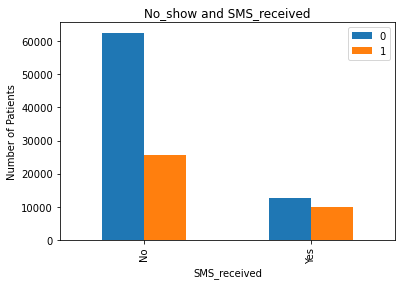

In [28]:
df.groupby(['No_show','SMS_received']).size().unstack(fill_value=1).plot.bar()
label('SMS_received', 'Number of Patients', 'No_show and SMS_received')

> Of the entire number of appointments, about 75044 patient (69.9%) did not receive an SMS (an approximate of 7.5/11 patient) while the remaining 35482 patient (30.1%) do receive an SMS (3.3/11 patient)

>However, of the 35482 sms sent out, 25,695(72.4%) did show up for their appointment and on the other hand, 9784(27.6%)did not show up.

>Like wise if the 22319 patients who did not show up for their appointment, a large number of them did not receive an SMS message.

<p><b>Conclusion</b> A reminder SMS does influence the patients to show up for appointments</p>

### Question 4:  What Effect Does Alcoholism Have on the Patients?

In [29]:
df.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [30]:
df.groupby(['No_show', 'Alcoholism']).size()

No_show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
dtype: int64

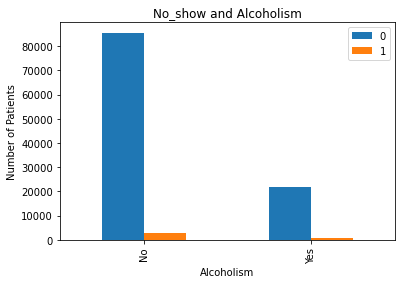

In [31]:
df.groupby(['No_show','Alcoholism']).size().unstack(fill_value=1).plot.bar()
label('Alcoholism', 'Number of Patients', 'No_show and Alcoholism')

> Of the entire number of appointments, about 3360 patient (3%) are alcoholic  while the remaining 35482 patient (87%) are not.

>However, of the 3360 alcoholic patient,  2683(79.9%) did show up for their appointment and on the other hand, 677(20.1%)did not show up. a large number of the alcoholic patient still show up for their appointments 

<p><b>Conclusion</b> DEspite Alcoholism, majority of them still show up for their  appointments</p>

### Question 5: What  Gender is More likely  to show up for their appointment ?

In [32]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [33]:
df.groupby(['No_show','Gender']).size()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
dtype: int64

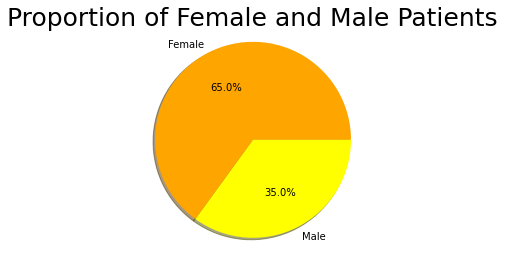

In [34]:
# Set variables for our pie chart 
labels = 'Female', 'Male'
sizes = [71839, 38687 ]
colors = ['Orange', 'yellow']

# piechart title and axis

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Female and Male Patients', fontsize= 25)

# removing the tilt.
plt.axis('equal')

#plot piechart
plt.show()

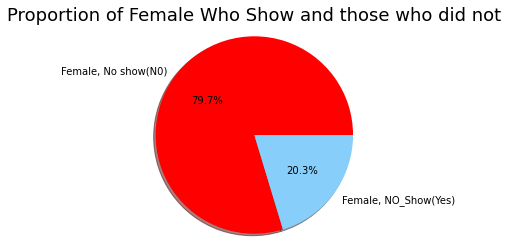

In [35]:
# Set variables for our pie chart 
labels = 'Female, No show(N0)', 'Female, NO_Show(Yes)'
sizes = [57245, 14594]
colors = ['red', 'lightskyblue']

# piechart title and axis

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Female Who Show and those who did not', fontsize= 18)

# removing the tilt.
plt.axis('equal')

#plot piechart
plt.show()

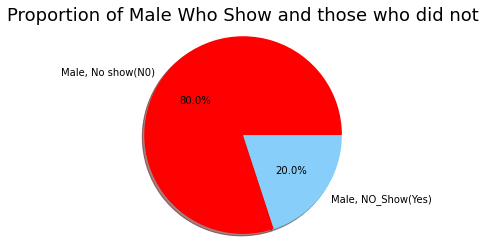

In [36]:
# Set variables for our pie chart 
labels = 'Male, No show(N0)', 'Male, NO_Show(Yes)'
sizes = [30962, 7725]
colors = ['red', 'lightskyblue']

# piechart title and axis

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Proportion of Male Who Show and those who did not', fontsize= 18)

# removing the tilt.
plt.axis('equal')

#plot piechart
plt.show()


>FRom our data set, we have an approxiate ratio of 4 Male to 7 Female. 65% being Female and 35% being Male.
Of the 65% Female data, 57245(79.7%) did show up for their appointments, while the remianing 14594(20.3%) did not. Likewise for the 35% male data set, 30962(80%) showed up for their appointment while the remaining 20% did not.

<p><b>Conclusion</b> Comparing the ration of Male to Female and the proportion to those showed up and those that did not. The Male Gender are more likely to show up for their appointment.</p>

### Question  6: Does having a combination of sickness affect if a patient shows up for appointments or not?

In [37]:
df.groupby([ "No_show", "Hypertension", "Diabetes", "Alcoholism"]).size()

No_show  Hypertension  Diabetes  Alcoholism
No       0             0         0             67473
                                 1              1537
                       1         0              1105
                                 1                63
         1             0         0             11811
                                 1               873
                       1         0              5135
                                 1               210
Yes      0             0         0             17838
                                 1               420
                       1         0               276
                                 1                13
         1             0         0              2433
                                 1               198
                       1         0              1095
                                 1                46
dtype: int64

>The information above give a general view of those living with two or three different kind of sickness.The sickeness we are focusing on are Diabetes, Hypertension and Alcoholism.

>A total of 85311 patient does not have any of the above states medical conditions. Out of these 67473(79%) showed up for their appointment while 17838(21%) did not show up for their medical appointment.

>a number of 6952 patients are living with just one kinds of sickness, which could be either Diabetes, Hypertension and Alcoholism. 3825(55%) did show up for their appointments, while 3129(45%) did not show up.

>Also, a number of 7368 patients are living with 2 kinds of sickness, irrespective of whichever combination, 6071(82.4%) did show up for their appointments, while 1297(27.6%) did not show up.

>For those living with 3 different kind of sickness, we have a total of 256 patients out of which 210(82%) did show up for their appointments and 18% did not show up for their.

><b>Conclusion</b>Regrding the data, while it might be rear to live with these 3 critical conditions, regardless, those with the 2 kind and 3 kinds of medical condition are more likely to show up for their appointment compare to those with just 1 kind or those without any.

<a id='conclusions'></a>
## Conclusions


>In order to look at the factors that are important to predicting if a patient will show up for their scheduled appointment or not, a lot of the variables presented in the data provided have been carefully considered. we can see that having a form of  scholarship program or social welfare program has really encourage alot of patients to show up for their medical appointment.Although one of the limitation is we do not have the financial data of each patient. This could have informed us if the patient could actually afford the medical process without the scholarship program.

>Additionally, sending a reminder sms regarding the schedule appointment has also been a positive impact as to if the patient will show up for there schedule appointent. A reasonable amount of patient who recieved the SMS did turn up for their appointment.

>The data also provide us with the information regarding how age groups of patient does not affect or determine if a patient will show up f0r there appointments or not. Different patients accross different age group did show up for their appointment. One of the limitation i find regarding the age group are in respect to the group below 10 years old. their showing up for appointment are still dependent on other factors, one of which might  the parent driving them to their appointments.

> The analysis has also shown that the female Gender are more likely not to show up for their appointment.

> Conclusively, The Scholarship, The sms, did affect the patients in showing up for their appoitment. The nature of a patients condition also affects if they will show up for their appointments. Those having 2 to 3 issues are more likely to show up for theor appointment.

